In [2]:
# 1. IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [3]:
# 2. LOADING THE DATASET
df = pd.read_csv(r"C:\Users\dilli\Downloads\wq.zip")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Shape: (3276, 10)

Columns: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

Head:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075    

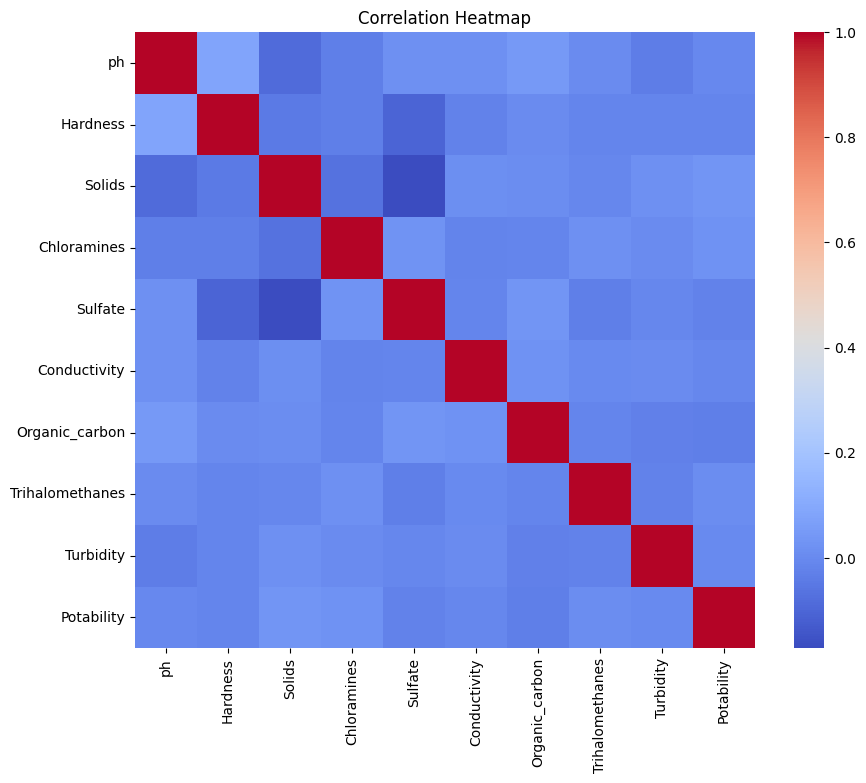

In [4]:
# 3. DATA EXPLORATION

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nHead:")
print(df.head())

print("\nTail:")
print(df.tail())

print("\nRandom Sample:")
print(df.sample(5, random_state=42))

print("\nInfo:")
print(df.info())

print("\nDescribe:")
print(df.describe())

print("\nNumber of duplicate rows:", df.duplicated().sum())
print("\nUnique values in Potability:", df["Potability"].unique())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Shape after dropping duplicates: (3276, 10)

Missing values per column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


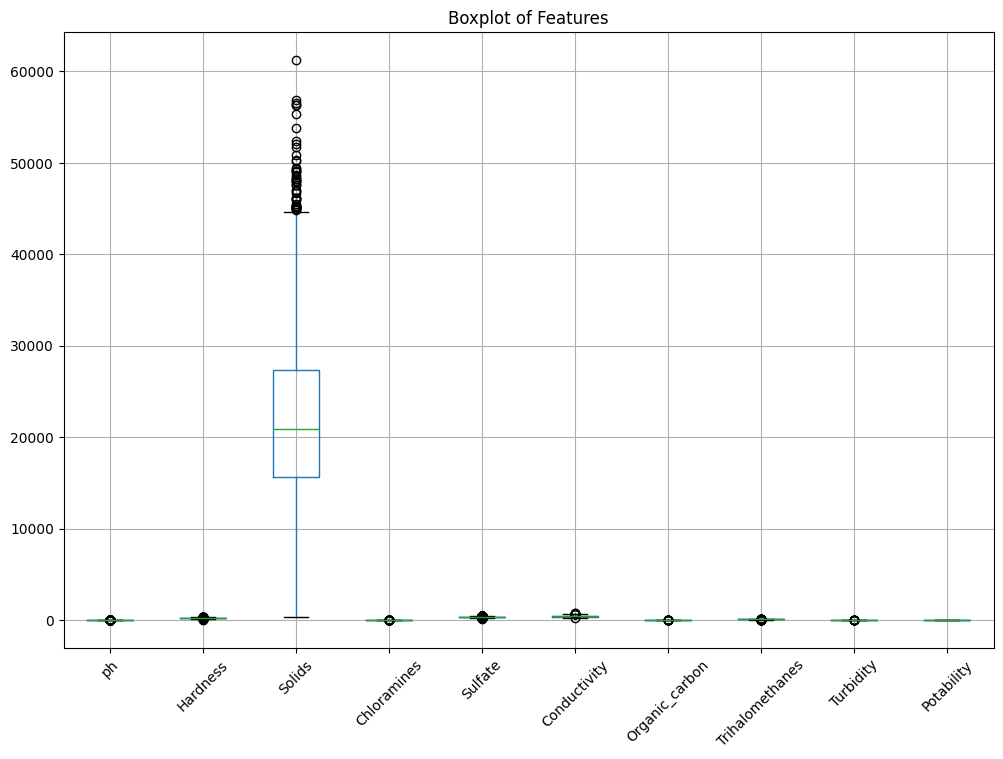

In [5]:
# 4. DATA CLEANING

# Drop duplicates
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing numeric values with median
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Boxplot for outliers
plt.figure(figsize=(12, 8))
df.boxplot(rot=45)
plt.title("Boxplot of Features")
plt.show()


In [6]:
# 5. DATA SCALING & FEATURE / TARGET SELECTION

# CLASSIFICATION: Potability as target
X_class = df.drop("Potability", axis=1)
y_class = df["Potability"]
X_class,y_class

(            ph    Hardness        Solids  Chloramines     Sulfate  \
 0     7.036752  204.890455  20791.318981     7.300212  368.516441   
 1     3.716080  129.422921  18630.057858     6.635246  333.073546   
 2     8.099124  224.236259  19909.541732     9.275884  333.073546   
 3     8.316766  214.373394  22018.417441     8.059332  356.886136   
 4     9.092223  181.101509  17978.986339     6.546600  310.135738   
 ...        ...         ...           ...          ...         ...   
 3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
 3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
 3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
 3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
 3275  7.874671  195.102299  17404.177061     7.509306  333.073546   
 
       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
 0       564.308654       10.379783        86.990970   2.963135  
 1       592.885359       

In [8]:
# REGRESSION: predict pH as continuous target
X_reg = df.drop("ph", axis=1)
y_reg = df["ph"]
X_reg,y_reg

(        Hardness        Solids  Chloramines     Sulfate  Conductivity  \
 0     204.890455  20791.318981     7.300212  368.516441    564.308654   
 1     129.422921  18630.057858     6.635246  333.073546    592.885359   
 2     224.236259  19909.541732     9.275884  333.073546    418.606213   
 3     214.373394  22018.417441     8.059332  356.886136    363.266516   
 4     181.101509  17978.986339     6.546600  310.135738    398.410813   
 ...          ...           ...          ...         ...           ...   
 3271  193.681735  47580.991603     7.166639  359.948574    526.424171   
 3272  193.553212  17329.802160     8.061362  333.073546    392.449580   
 3273  175.762646  33155.578218     7.350233  333.073546    432.044783   
 3274  230.603758  11983.869376     6.303357  333.073546    402.883113   
 3275  195.102299  17404.177061     7.509306  333.073546    327.459760   
 
       Organic_carbon  Trihalomethanes  Turbidity  Potability  
 0          10.379783        86.990970   2.963

In [9]:
# StandardScaler for both tasks
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)
mm_scaler = MinMaxScaler()
X_class_mm = mm_scaler.fit_transform(X_class)
X_reg_mm = mm_scaler.fit_transform(X_reg)

In [10]:
# 7. TRAIN-TEST SPLIT

# Classification
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class_scaled, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Regression
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

print("Classification -> X_train:", Xc_train.shape, ", X_test:", Xc_test.shape)
print("Regression -> X_train:", Xr_train.shape, ", X_test:", Xr_test.shape)

Classification -> X_train: (2620, 9) , X_test: (656, 9)
Regression -> X_train: (2620, 9) , X_test: (656, 9)


In [11]:
# 8. BUILD MODELS (CLASSIFICATION)
log_clf = LogisticRegression(max_iter=1000)
dt_clf  = DecisionTreeClassifier(random_state=42)


In [12]:
# 9. TRAIN MODELS (CLASSIFICATION)
log_clf.fit(Xc_train, yc_train)
dt_clf.fit(Xc_train, yc_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
# 10. PREDICT (CLASSIFICATION)
yc_pred_log = log_clf.predict(Xc_test)
yc_pred_dt  = dt_clf.predict(Xc_test)

In [14]:
# 11. PERFORMANCE EVALUATION (CLASSIFICATION)
def evaluate_classification(model_name, y_true, y_pred):
    print(f"\n=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred,zero_division=0))

evaluate_classification("Logistic Regression", yc_test, yc_pred_log)
evaluate_classification("Decision Tree Classifier", yc_test, yc_pred_dt)



=== Logistic Regression ===
Accuracy: 0.6097560975609756
Confusion Matrix:
 [[400   0]
 [256   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656


=== Decision Tree Classifier ===
Accuracy: 0.5960365853658537
Confusion Matrix:
 [[275 125]
 [140 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.67       400
           1       0.48      0.45      0.47       256

    accuracy                           0.60       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.60      0.59       656



In [15]:
# 12. PREDICT FOR A SAMPLE (CLASSIFICATION)
sample = X_class.iloc[0:1]
sample_scaled = scaler_class.transform(sample)

print("\nOriginal Classification Sample:")
print(sample)

print("Logistic Regression Prediction (Potability):", log_clf.predict(sample_scaled)[0])
print("Decision Tree Prediction (Potability):",      dt_clf.predict(sample_scaled)[0])



Original Classification Sample:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.036752  204.890455  20791.318981     7.300212  368.516441    564.308654   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783         86.99097   2.963135  
Logistic Regression Prediction (Potability): 0
Decision Tree Prediction (Potability): 0


In [16]:
# 8. BUILD MODELS (REGRESSION)
lin_reg = LinearRegression()
dt_reg  = DecisionTreeRegressor(random_state=42)


In [17]:
# 9. TRAIN MODELS (REGRESSION)
lin_reg.fit(Xr_train, yr_train)
dt_reg.fit(Xr_train, yr_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [18]:
# 10. PREDICT (REGRESSION)
yr_pred_lin = lin_reg.predict(Xr_test)
yr_pred_dt  = dt_reg.predict(Xr_test)
yr_pred_lin

array([7.07366587, 6.88192195, 7.2766458 , 7.19960898, 6.84880112,
       6.54374219, 7.11213308, 6.82643774, 6.99722234, 7.08810552,
       7.22359661, 7.09810402, 7.66016715, 7.15631024, 6.7758169 ,
       6.83825661, 7.11696192, 7.03628831, 7.21571517, 7.08078116,
       7.56883247, 7.14819601, 7.27986614, 7.00236686, 7.16530812,
       7.20105202, 7.18870994, 7.37432025, 6.9881654 , 7.11947962,
       7.31099046, 7.25814173, 7.01585938, 7.08265968, 6.95884371,
       7.12831602, 7.18958581, 7.45191372, 7.05780928, 6.93229863,
       7.22341887, 7.01786389, 7.39082529, 7.0454669 , 7.14926724,
       7.05837515, 7.06173112, 7.14981818, 7.10429302, 7.10119939,
       7.18042583, 7.18078386, 7.16791538, 6.79823727, 7.01442438,
       7.08068375, 7.0718938 , 6.93219522, 7.15426922, 6.95066788,
       7.07228855, 6.99031032, 7.05009719, 6.96981758, 7.39228556,
       7.00106941, 7.23477867, 7.04602431, 7.09336325, 7.32210749,
       7.41829876, 7.14297843, 7.1339712 , 7.18269842, 7.22459

In [19]:
# 11. PERFORMANCE EVALUATION (REGRESSION)
def evaluate_regression(model_name, y_true, y_pred):
    print(f"\n=== {model_name} ===")
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    
    print("MAE :", mae)
    print("MSE :", mse)
    print("RMSE:", rmse)
    print("R²  :", r2)

evaluate_regression("Linear Regression", yr_test, yr_pred_lin)
evaluate_regression("Decision Tree Regressor", yr_test, yr_pred_dt)



=== Linear Regression ===
MAE : 1.0844023345711764
MSE : 2.200975857180865
RMSE: 1.4835686223363127
R²  : 0.01961963129151212

=== Decision Tree Regressor ===
MAE : 1.5919669703007333
MSE : 4.267837328833774
RMSE: 2.065874470734796
R²  : -0.9010221853996805


In [20]:
# 12. PREDICT FOR A SAMPLE (REGRESSION)

sample_reg = X_reg.iloc[0:1]
sample_reg_scaled = scaler_reg.transform(sample_reg)

print("\nOriginal Regression Sample:")
print(sample_reg)

print("Linear Regression prediction (pH):",       lin_reg.predict(sample_reg_scaled)[0])
print("Decision Tree Regressor prediction (pH):", dt_reg.predict(sample_reg_scaled)[0])



Original Regression Sample:
     Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  204.890455  20791.318981     7.300212  368.516441    564.308654   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783         86.99097   2.963135           0  
Linear Regression prediction (pH): 7.163054996231749
Decision Tree Regressor prediction (pH): 7.036752103833547
